## 시각화에 필요한 설정 적용 코드

In [2]:
import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
## Graph style control ##

# %matplotlib inline  # matplotlib이 주피터 내부에 출력되도록 magic method 설정
sns.set_theme(style="darkgrid", palette="pastel")  # Seaborn built-in themes 활용
sns.set_context("paper") # Seaborn plot styling
mpl.rcParams['font.size'] = 12  # 폰트 사이즈 설정
mpl.rcParams['figure.figsize'] = (9, 5) # figure 크기 설정
mpl.rcParams['figure.facecolor'] = '#00000000' # figure 바탕색 설정

In [8]:
# Control font process
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/Users/PlayData/AppData/Local/Microsoft/Windows/Fonts'] 
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

NanumGothic
Dongle
Dokdo
????
EF_????
['NanumGothic']


## 노인 인구 수, 사고 발생 수 시각화

In [11]:
data_older_population = pd.read_csv('workspace-road_safety_visualization_with_oldman/data_older_population.csv') # 서울시 노인 인구 데이터 Roading
data_older_population = data_older_population.astype({'소계':'int'}) # 소계 column 의 'string' type을 가공 process에 적합한 'int' type으로 변환
data_older_population = data_older_population.sort_values('동별', ascending=False) # 지역구를 기준으로 정렬

In [12]:
data_older_accident_number = pd.read_csv('workspace-road_safety_visualization_with_oldman/ped.csv') # 노인 교통사고 발생 수 데이터 Roading
data_older_accident_number = data_older_accident_number.sort_values('지역구', ascending=False) # 지역구를 기준으로 정렬

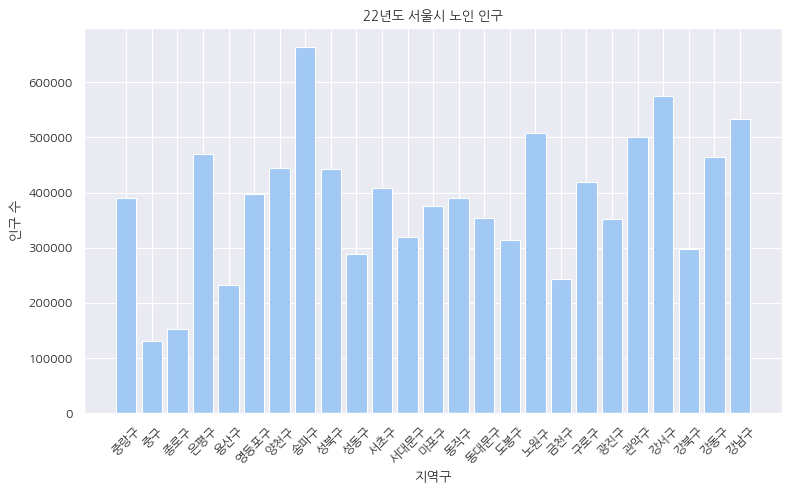

In [13]:
# 지역구별 2022년 서울시 노인 인구
plt.bar(data_older_population["동별"], data_older_population["소계"], color = 'b') # 노인 인구 데이터에서 지역과 인구 수 값을 각각 x, y 축에 적용
plt.xticks(rotation=45) # x labels 출력 각도 조정
plt.title("22년도 서울시 노인 인구") # Title 설정
plt.ylabel("인구 수") # Label 설정
plt.xlabel("지역구")
plt.show() # 그래프 출력

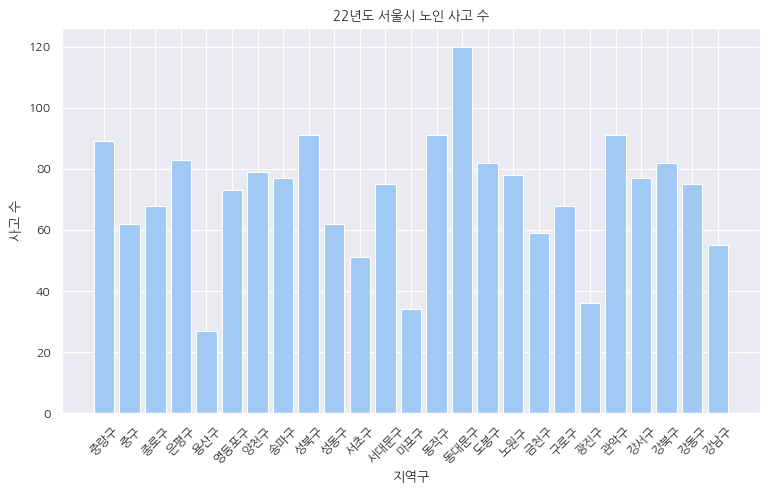

In [14]:
# 지역구별 2022 서울시 노인 사고 건수
plt.bar(data_older_accident_number["지역구"], data_older_accident_number["발생건수"], color = 'b') # 노인 사고 횟수 데이터에서 지역과 사고 수 값을 각각 x, y 축에 적용
plt.xticks(rotation=45) # x labels 출력 각도 조정
plt.title("22년도 서울시 노인 사고 수") # Title 설정
plt.ylabel("사고 수") # Label 설정
plt.xlabel("지역구")
plt.show() # 그래프 출력

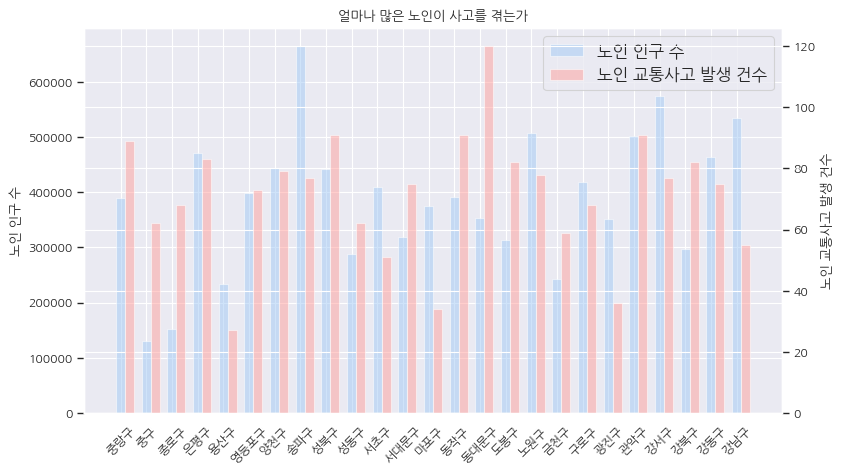

<Figure size 1500x1000 with 0 Axes>

In [28]:
# column에 문제가 있던 코드
fig, ax3 = plt.subplots() # axes3 생성

bar_width = 0.35 # 막대 너비 설정
alpha = 0.5 # 투명도 설정
plt.figure(figsize = (15,10)) # figure 사이즈 설정
N = len(data_older_population['동별'].unique()) # p4 를 그릴 position 생성
index = np.arange(N)
ax3.set_ylabel("노인 인구 수")
ax3.xaxis.set_tick_params(rotation=45) # ax3의 x 눈금 45도 각도로 출력
p3 = ax3.bar(data_older_population['동별'], data_older_population["소계"], bar_width, alpha=alpha, color='b') # 노인 인구 수 bar

ax4 = ax3.twinx() # axes3에 axes4를 겹쳐 생성
ax4.set_ylabel("노인 교통사고 발생 건수")
ax4.set_xticks(index + bar_width, minor=True) # 다른 데이터프레임이라 p4의 x 눈금도 표시되는 것을 출력되지 않도록 설정
p4 = ax4.bar(index + bar_width, data_older_accident_number['발생건수'], bar_width, alpha=alpha, color='r') # 노인 교통사고 발생 건수 bar, 설정한 p4 position에 그려지도록 입력

ax3.legend((p3, p4), ('노인 인구 수', '노인 교통사고 발생 건수'), fontsize = 12, loc='upper right') # 범례 입력
ax3.set_title("얼마나 많은 노인이 사고를 겪는가") # Title 입력

plt.show()

## 고령화 데이터 시각화

In [16]:
aging_data = pd.read_csv('workspace-road_safety_visualization_with_oldman/aging_data.csv') # 년도별 인구 현황과 전망 데이터 Roading
aging_data

,년도,총 인구,65세 이상
0,2010,49554,5366
1,2020,51836,8152
2,2022,51628,9018
3,2025,51448,10585
4,2030,51199,13056
5,2035,50869,15289
6,2040,50193,17245
7,2050,47359,19004
8,2060,42617,18683
9,2070,37656,17473


In [17]:
aging_data["비율"] = aging_data["65세 이상"] / aging_data['총 인구'] # 총 인구별 노인 인구 비율 생성
aging_data

,년도,총 인구,65세 이상,비율
0,2010,49554,5366,0.108286
1,2020,51836,8152,0.157265
2,2022,51628,9018,0.174673
3,2025,51448,10585,0.205742
4,2030,51199,13056,0.255005
5,2035,50869,15289,0.300556
6,2040,50193,17245,0.343574
7,2050,47359,19004,0.401275
8,2060,42617,18683,0.438393
9,2070,37656,17473,0.464016


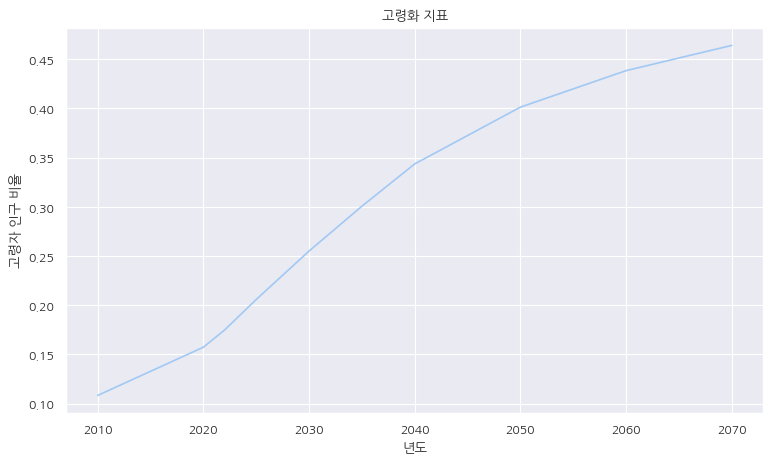

In [18]:
plt.title("고령화 지표")
plt.plot(aging_data["년도"], aging_data["비율"])
plt.xlabel("년도")
plt.ylabel("고령자 인구 비율")
plt.show() # 고령화 지표 그리기

## 최근 5년간 보행자 교통사고 사망자 비교

In [9]:
difference_total_to_old = pd.DataFrame({"17년": [1675, 906], "18년": [1487, 842], 
                                        "19년": [1302, 743], "20년": [1093, 628], "21년": [1018, 601]}, index= ["전체 사망자", "노인 사망자"]) # 전체 사망자, 노인 사망자 데이터 생성
difference_total_to_old

,17년,18년,19년,20년,21년
전체 사망자,1675,1487,1302,1093,1018
노인 사망자,906,842,743,628,601


In [10]:
difference_total_to_old.loc["노인 사망비율"] = difference_total_to_old.loc["노인 사망자"] / difference_total_to_old.loc["전체 사망자"] * 100 # 사망 비율 row, values 생성
difference_total_to_old

,17년,18년,19년,20년,21년
전체 사망자,1675.000000,1487.000000,1302.000000,1093.000000,1018.000000
노인 사망자,906.000000,842.000000,743.000000,628.000000,601.000000
노인 사망비율,54.089552,56.624075,57.066052,57.456542,59.037328


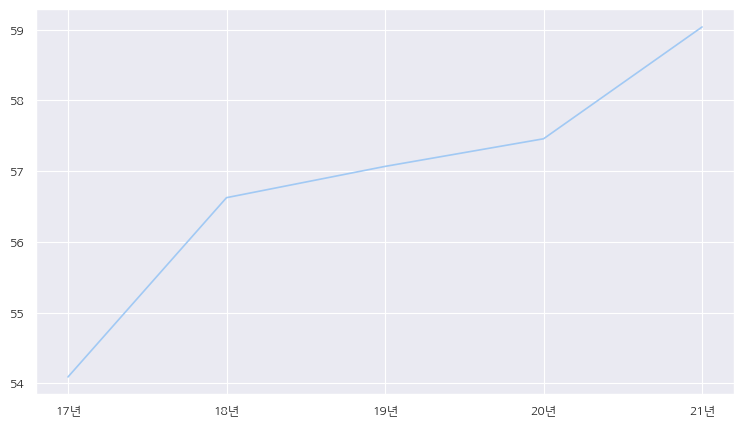

In [11]:
plt.plot(difference_total_to_old.loc["노인 사망비율"]) # 잘 그려지는지 확인

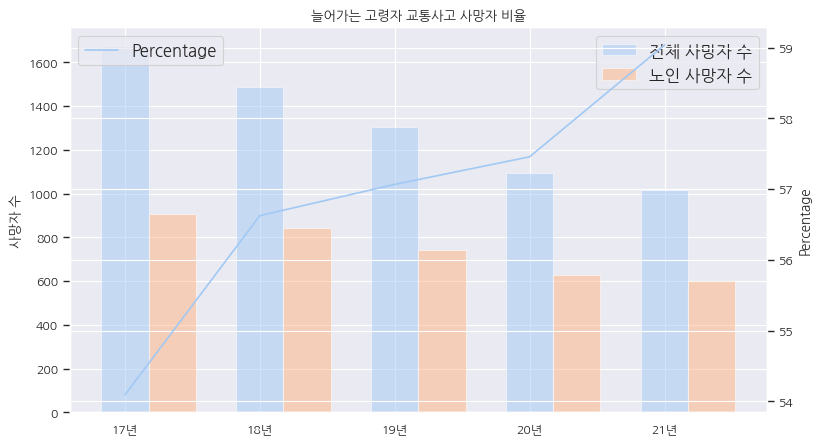

<Figure size 1000x1000 with 0 Axes>

In [14]:
fig, ax1 = plt.subplots() # axes1 생성

bar_width = 0.35 # 막대 너비 설정
alpha = 0.5 # 투명도 설정
plt.figure(figsize = (10,10)) # figure 사이즈 설정
N = len(difference_total_to_old.columns.unique()) # p1의 눈금 위치 추출하기 위해 준비, p1의 x 눈금 갯수를 저장
index = np.arange(N) # p2를 그리기 위해 p1의 x 눈금 위치 추출
ax1.set_ylabel("사망자 수")
p1 = ax1.bar(difference_total_to_old.columns, difference_total_to_old.loc['전체 사망자'], bar_width, alpha=alpha) # axes1 에 전체 사망자 수 bar 그리기
p2 = ax1.bar(index + bar_width, difference_total_to_old.loc["노인 사망자"], bar_width, alpha=alpha) # axes1 에 노인 사망자 수 bar 그리기

ax1.legend((p1, p2), ('전체 사망자 수', '노인 사망자 수'), fontsize = 12, loc='upper right') # axes1 범례 입력

ax2= ax1.twinx() # axes2 를 axes1 과 겹치게 생성
ax2.set_ylabel("Percentage")
p3 = ax2.plot(difference_total_to_old.columns, difference_total_to_old.loc["노인 사망비율"], label="Percentage") # axes2에 노인 사망비율 선 그래프 그리기
ax2.legend(loc='upper left', fontsize= 12) # axes2 범례 입력
ax1.set_title("늘어가는 고령자 교통사고 사망자 비율") # Title 입력
plt.show() # 전체 사망자, 노인 사망자, 전체에서 노인 사망자의 비율의 세 그래프를 한 figure에 plot